- Revenue => class whether it can make a revenue or not
- Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related - Duration => represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
- Bounce Rate => percentage of visitors who enter the site from that page and then leave (“bounce”) without triggering any other requests to the analytics server during that session
- Exit Rate => the percentage that were the last in the session
- Page Value => feature represents the average value for a web page that a user visited before completing an e-commerce transaction
- Special Day => indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine’s Day) in which the sessions are more likely to be finalized with transaction. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero,before and after this date unless it is close to another special day, and its maximum value of 1 on February 8
- Operating system,browser, region, traffic type => Different types of operating systems, browser, region and traffic type used to visit the website
- Visitor type => Whether the customer is a returning or new visitor
- Weekend => A Boolean value indicating whether the date of the visit is weekend
- Month => Month of the year.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

    There is a huge imbalance in sampling, so definitely will need to upsample

In [4]:
df.isna()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12326,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12327,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12328,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#Checking the columns that are null, it looks nan values across columns all occur on the same observations so we can just drop
df[df.Administrative.isnull()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


In [6]:
df.shape

(12330, 18)

In [7]:
df.dropna(inplace=True)
df.shape

(12316, 18)

In [8]:
df['ExitRates'].corr(df['Revenue'])

-0.20688604063028454

In [9]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [10]:
df.ExitRates.describe()

count    12316.000000
mean         0.043003
std          0.048527
min          0.000000
25%          0.014286
50%          0.025124
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

In [11]:
#Dropping the negative duration values, because they have no meaning in the real world. Additionaly all of the -1 values correspond with a false revenue, and since we have a huge imbalance we're okay with dropping
df = df[df['Administrative_Duration'] != -1]

In [12]:
df.shape

(12283, 18)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12283 non-null  float64
 1   Administrative_Duration  12283 non-null  float64
 2   Informational            12283 non-null  float64
 3   Informational_Duration   12283 non-null  float64
 4   ProductRelated           12283 non-null  float64
 5   ProductRelated_Duration  12283 non-null  float64
 6   BounceRates              12283 non-null  float64
 7   ExitRates                12283 non-null  float64
 8   PageValues               12283 non-null  float64
 9   SpecialDay               12283 non-null  float64
 10  Month                    12283 non-null  object 
 11  OperatingSystems         12283 non-null  int64  
 12  Browser                  12283 non-null  int64  
 13  Region                   12283 non-null  int64  
 14  TrafficType           

In [14]:
df[df['VisitorType']=='Other'].Revenue.value_counts()

False    69
True     16
Name: Revenue, dtype: int64

In [15]:
# df = df.where('VisitorType'=='Returning_Visitor', 1, df['VisitorType'])

In [16]:
df.groupby(['PageValues']).Revenue.value_counts()

PageValues  Revenue
0.000000    False      9183
            True        370
0.038035    False         1
0.067050    True          1
0.093547    True          1
                       ... 
261.491286  True          1
270.784693  True          1
287.953793  True          1
360.953384  True          1
361.763742  True          1
Name: Revenue, Length: 2710, dtype: int64

In [17]:
page = df[df['PageValues']>0]

In [18]:
page

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
29,1.0,6.000000,1.0,0.00,45.0,1582.750000,0.043478,0.050821,54.179764,0.4,Feb,3,2,1,1,Returning_Visitor,False,False
57,4.0,56.000000,2.0,120.00,36.0,998.741667,0.000000,0.014736,19.447079,0.2,Feb,2,2,4,1,Returning_Visitor,False,False
62,12.0,279.416667,0.0,0.00,42.0,1553.583333,0.009000,0.019667,38.308493,0.0,Feb,1,1,3,2,Returning_Visitor,False,False
65,3.0,87.833333,0.0,0.00,27.0,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,True
76,10.0,1005.666667,0.0,0.00,36.0,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12307,2.0,305.125000,3.0,368.25,27.0,1121.250000,0.020000,0.042857,39.519807,0.0,Dec,3,2,1,2,Returning_Visitor,False,False
12312,7.0,150.357143,1.0,9.00,221.0,11431.001240,0.011149,0.021904,1.582473,0.0,Nov,2,5,1,2,Returning_Visitor,True,True
12313,3.0,16.000000,3.0,86.00,15.0,2773.500000,0.000000,0.030000,78.811725,0.0,Dec,2,2,1,2,Returning_Visitor,False,True
12319,0.0,0.000000,0.0,0.00,21.0,1128.583333,0.000000,0.013043,3.685401,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


In [19]:
#0=Winter, 1=Spring, 2=Summer, 3=Fall
df['Season'] = df.Month.map(lambda x: 'Winter' if (x=='Jan' or x=='Feb' or x=='Mar') else 
                            ('Spring' if (x=='Apr' or x=='May' or x=='June') else 
                             ('Summer' if (x=='Jul' or x=='Aug' or x=='Sep') else 
                             ('Fall' if (x=='Oct' or x=='Nov' or x=='Dec') else x))))
# df['Season'] = df.Month.map(lambda x: 'Spring' if (x=='Apr' or x=='May' or x=='Jun') else x)
# df['Season'] = df.Month.map(lambda x: 'Summer' if (x=='Jul' or x=='Aug' or x=='Sep') else x)
# df['Season'] = df.Month.map(lambda x: 'Fall' if (x=='Oct' or x=='Nov' or x=='Dec') else x)

In [20]:
df.Revenue.value_counts()

False    10375
True      1908
Name: Revenue, dtype: int64

In [21]:
df['Revenue'] = df['Revenue'].map(lambda x: 1 if x ==True else 0)

### Which season had the most purchases?

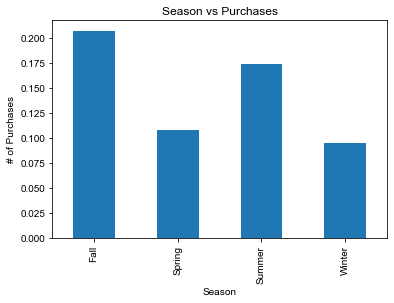

In [22]:
grp = df[df['Revenue']==1]
y = df.groupby(['Season']).Revenue.mean();
y.plot.bar()
# sns.barplot(x,y)
sns.set(style='dark')
plt.title('Season vs Purchases', fontsize=12);
plt.xlabel('Season');
plt.ylabel('# of Purchases');
# plt.suptitle(, fontsize=12);

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12283 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12283 non-null  float64
 1   Administrative_Duration  12283 non-null  float64
 2   Informational            12283 non-null  float64
 3   Informational_Duration   12283 non-null  float64
 4   ProductRelated           12283 non-null  float64
 5   ProductRelated_Duration  12283 non-null  float64
 6   BounceRates              12283 non-null  float64
 7   ExitRates                12283 non-null  float64
 8   PageValues               12283 non-null  float64
 9   SpecialDay               12283 non-null  float64
 10  Month                    12283 non-null  object 
 11  OperatingSystems         12283 non-null  int64  
 12  Browser                  12283 non-null  int64  
 13  Region                   12283 non-null  int64  
 14  TrafficType           

In [24]:
df_season_winter = df[df['Season']=='Winter']
df_season_spring = df[df['Season']=='Spring']
df_season_summer = df[df['Season']=='Summer']
df_season_fall = df[df['Season']=='Fall']

In [25]:
df_freq2=pd.DataFrame(columns=['winter_purchase', 'spring_purchase', 'summer_purchase', 'fall_purchase'])
df_freq2['winter_purchase']= df_season_winter.groupby('Revenue')['Revenue'].count()
df_freq2['spring_purchase']= df_season_spring.groupby('Revenue')['Revenue'].count()
df_freq2['summer_purchase']= df_season_summer.groupby('Revenue')['Revenue'].count()
df_freq2['fall_purchase']= df_season_fall.groupby('Revenue')['Revenue'].count()


In [26]:
stat,p,dof,expected = stats.chi2_contingency(df_freq2)

In [27]:
prob=0.95
critical=stats.chi2.ppf(prob,dof)

In [28]:
critical,stat

(7.814727903251179, 229.78133032931356)

In [29]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df_freq2
print(table)
stat, p, dof, expected = chi2_contingency(df_freq2)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

         winter_purchase  spring_purchase  summer_purchase  fall_purchase
Revenue                                                                  
0                   1860             3251             1084           4180
1                    195              394              228           1091
dof=3
[[1735.78319629 3078.7979321  1108.19832289 4452.22054873]
 [ 319.21680371  566.2020679   203.80167711  818.77945127]]
probability=0.950, critical=7.815, stat=229.781)
Dependent (regject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


#### We can reject our null hypothesis and say there is a significant diffence in the portion of purchases between the seasons

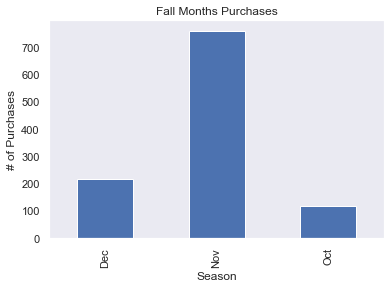

In [30]:
fall = df[(df['Season'] =='Fall') & (df['Revenue']==1)]
grp = fall.groupby(['Month'])
y = fall.groupby(['Month']).Revenue.sum();
y.plot.bar()
# sns.barplot(x,y)
sns.set(style='dark')
plt.title('Fall Months Purchases', fontsize=12);
plt.xlabel('Season');
plt.ylabel('# of Purchases');
# plt.suptitle(, fontsize=12);

In [31]:
df_fall_dec = df[df['Month']=='Dec']
df_fall_nov = df[df['Month']=='Nov']
df_fall_oct = df[df['Month']=='Oct']

In [32]:
df_freq3=pd.DataFrame(columns=['dec_purchase', 'nov_purchase', 'oct_purchase'])
df_freq3['dec_purchase']= df_fall_dec.groupby('Revenue')['Revenue'].count()
df_freq3['nov_purchase']= df_fall_nov.groupby('Revenue')['Revenue'].count()
df_freq3['oct_purchase']= df_fall_oct.groupby('Revenue')['Revenue'].count()

In [33]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df_freq3
print(table)
stat, p, dof, expected = chi2_contingency(df_freq3)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

         dec_purchase  nov_purchase  oct_purchase
Revenue                                          
0                1511          2235           434
1                 216           760           115
dof=2
[[1369.54278126 2375.09011573  435.36710302]
 [ 357.45721874  619.90988427  113.63289698]]
probability=0.950, critical=5.991, stat=110.532)
Dependent (regject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


### We can reject the null and say that there is a significant difference in proportion of purchases in the fall months.

In [34]:
df[df['Month']=='Feb']

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Season
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,0,Winter
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,0,Winter
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,0,Winter
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,0,Winter
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1.0,0.0,0.0,0.0,21.0,405.709524,0.010744,0.047003,0.0,0.0,Feb,1,1,1,4,Returning_Visitor,False,0,Winter
178,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,0,Winter
179,0.0,0.0,0.0,0.0,6.0,163.250000,0.033333,0.033333,0.0,0.6,Feb,1,1,6,2,Returning_Visitor,False,0,Winter
180,0.0,0.0,0.0,0.0,17.0,284.250000,0.000000,0.011765,0.0,0.0,Feb,3,2,6,2,Returning_Visitor,True,0,Winter


### What kind of VisitorType make the most purchases?

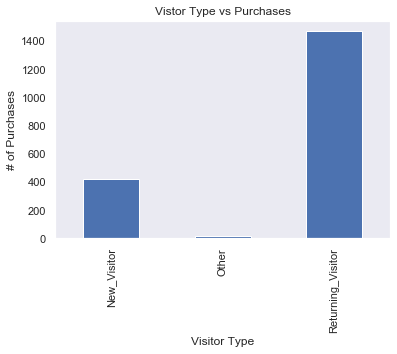

In [35]:

y = df.groupby(['VisitorType']).Revenue.sum();
y.plot.bar()
# sns.barplot(x,y)
sns.set(style='dark')
plt.title('Vistor Type vs Purchases', fontsize=12);
plt.xlabel('Visitor Type');
plt.ylabel('# of Purchases');
# plt.suptitle(, fontsize=12);
#Limitation: Summer is 4 months long, whereas Holiday season is 2 months

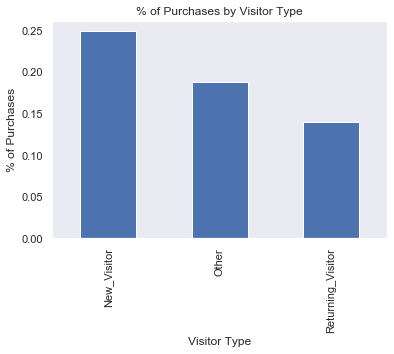

In [36]:

y = df.groupby(['VisitorType']).Revenue.mean();
y.plot.bar()
# sns.barplot(x,y)
sns.set(style='dark')
plt.title('% of Purchases by Visitor Type', fontsize=12);
plt.xlabel('Visitor Type');
plt.ylabel('% of Purchases');
# plt.suptitle(, fontsize=12);
#Limitation: Summer is 4 months long, whereas Holiday season is 2 months

In [37]:
df_new_visitor = df[df['VisitorType']=='New_Visitor']
df_returning_visitor = df[df['VisitorType']=='Returning_Visitor']
df_other = df[df['VisitorType']=='Other']

In [38]:
df_freq4=pd.DataFrame(columns=['new_purchase', 'returning_purchase', 'other_purchase'])
df_freq4['new_purchase']= df_new_visitor.groupby('Revenue')['Revenue'].count()
df_freq4['returning_purchase']= df_returning_visitor.groupby('Revenue')['Revenue'].count()
df_freq4['other_purchase']= df_other.groupby('Revenue')['Revenue'].count()

In [39]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# contingency table
table = df_freq4
print(table)
stat, p, dof, expected = chi2_contingency(df_freq4)
print('dof=%d' % dof)
print(expected)
#interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f)' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Dependent (regject H0)')
else:
    print('Independent (fail to reject H0)')
#interpret p-value
alpha= 1-prob
print('signigicance=%.3f, p=%.3f,' % (alpha, p))
if p <= alpha:
    print('Dependent (reject H0)')
else: 
    print('Independent (fail to reject)')

         new_purchase  returning_purchase  other_purchase
Revenue                                                  
0                1272                9034              69
1                 422                1470              16
dof=2
[[1430.85972482 8872.34388993   71.79638525]
 [ 263.14027518 1631.65611007   13.20361475]]
probability=0.950, critical=5.991, stat=133.205)
Dependent (regject H0)
signigicance=0.050, p=0.000,
Dependent (reject H0)


In [40]:
df[df['Revenue']==1].Revenue.sum()

1908

In [44]:
df['Product_Duration'] = df['ProductRelated_Duration'].apply(lambda x: 0 if 0<=x<=187 else
                                                             (1 if 187<x<=602.5 else 
                                                              ( 2 if 602.5<x<=1470.91 else 
                                                              (3 if 1470.91 <x <=63973.52 else(4)))))

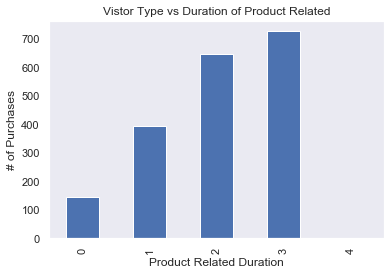

In [45]:

y = df.groupby(['Product_Duration']).Revenue.sum();
y.plot.bar()
# sns.barplot(x,y)
sns.set(style='dark')
plt.title('Vistor Type vs Duration of Product Related', fontsize=12);
plt.xlabel('Product Related Duration');
plt.ylabel('# of Purchases');
# plt.suptitle(, fontsize=12);

Text(0, 0.5, 'Number of Visitors')

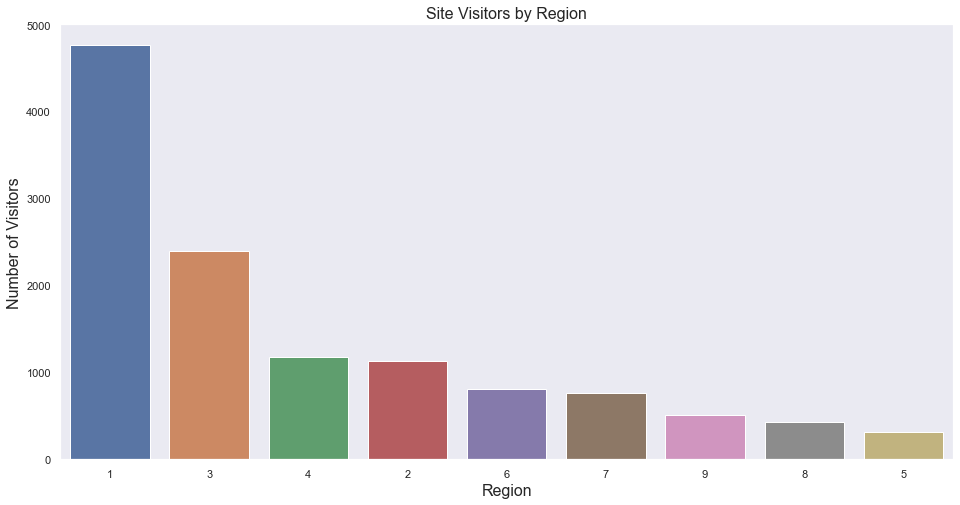

In [46]:
plt.figure(figsize = (16,8))
sns.countplot(x = "Region", data = df, 
              order = df['Region'].value_counts().index)
plt.title("Site Visitors by Region", fontsize = 16)
plt.xlabel("Region", fontsize = 16)
plt.ylabel("Number of Visitors", fontsize = 16)

In [47]:
df['Region']= df['Region'].astype('category')

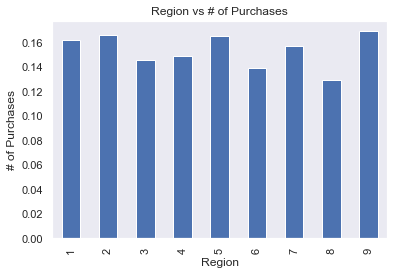

In [48]:

y = df.groupby(['Region']).Revenue.mean();
y.plot.bar()
# sns.barplot(x,y)
sns.set(style='dark')
plt.title('Region vs # of Purchases', fontsize=12);
plt.xlabel('Region');
plt.ylabel('# of Purchases');
# plt.suptitle(, fontsize=12);

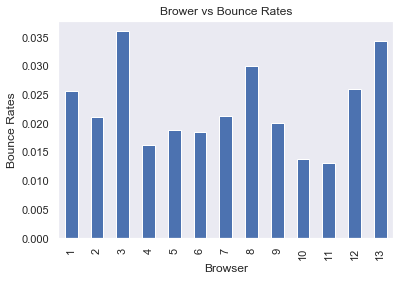

In [49]:

y = df.groupby(['Browser']).BounceRates.mean();
y.plot.bar()
# sns.barplot(x,y)
sns.set(style='dark')
plt.title('Brower vs Bounce Rates', fontsize=12);
plt.xlabel('Browser');
plt.ylabel('Bounce Rates');
# plt.suptitle(, fontsize=12)

We wanted to see which browsers have higher bounce rates, as it may be in the UI design that something isn't working correctly for that specific browser.

## Special day's and how it effects purchasing

In [50]:
df.SpecialDay.value_counts(normalize=True)

0.0    0.898396
0.6    0.028413
0.8    0.026459
0.4    0.019702
0.2    0.014492
1.0    0.012538
Name: SpecialDay, dtype: float64

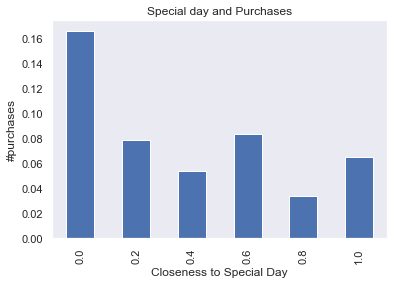

In [51]:
y = df.groupby(['SpecialDay']).Revenue.mean();
y.plot.bar()
# sns.barplot(x,y)
sns.set(style='dark')
plt.title('Special day and Purchases', fontsize=12);
plt.xlabel('Closeness to Special Day');
plt.ylabel('#purchases');
# plt.suptitle(, fontsize=12)

In [52]:
df.SpecialDay.describe()

count    12283.000000
mean         0.061532
std          0.199122
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

In [53]:
df['Special']=df['SpecialDay'].apply(lambda x: 1 if x> 0 else(0))

In [54]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Season,Product_Duration,Special
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,...,1,1,1,1,Returning_Visitor,False,0,Winter,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,...,2,2,1,2,Returning_Visitor,False,0,Winter,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,...,3,2,2,4,Returning_Visitor,False,0,Winter,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,...,3,3,1,4,Returning_Visitor,True,0,Winter,2,0
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,...,2,2,1,3,Returning_Visitor,False,0,Winter,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,...,4,6,1,1,Returning_Visitor,True,0,Fall,3,0
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,...,3,2,1,8,Returning_Visitor,True,0,Fall,1,0
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,...,3,2,1,13,Returning_Visitor,True,0,Fall,0,0
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,...,2,2,3,11,Returning_Visitor,False,0,Fall,1,0


We want to see if people make purchases closer to 'Special' holidays. Looking at the graph below it doesn't look like there is a difference between

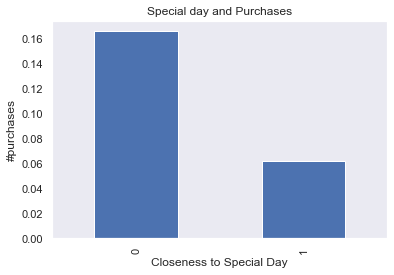

In [84]:
y = df.groupby(['Special']).Revenue.mean();
y.plot.bar()
# sns.barplot(x,y)
sns.set(style='dark')
plt.title('Special day and Purchases', fontsize=12);
plt.xlabel('Closeness to Special Day');
plt.ylabel('#purchases');
# plt.suptitle(, fontsize=12)

## What can the duration of a Product Related duration tell us about purchasing?

    H(null): Product_Duration(No Purchase) = Product_Duration(Purchased)
    H(alternative): Product_Duration(No Purchase) != Product_Duration(Purchased)

In [85]:
no_purchase = df[df['Revenue']==0]
purchase = df[df['Revenue']==1]

In [86]:
stats.ttest_ind(no_purchase['ProductRelated_Duration'], purchase['ProductRelated_Duration'])

Ttest_indResult(statistic=-16.98844341060936, pvalue=5.37178190067475e-64)

#### We can reject null hypothesis and say that there is a significant difference between the duration of a product related page between people who purchased a product than those who did not

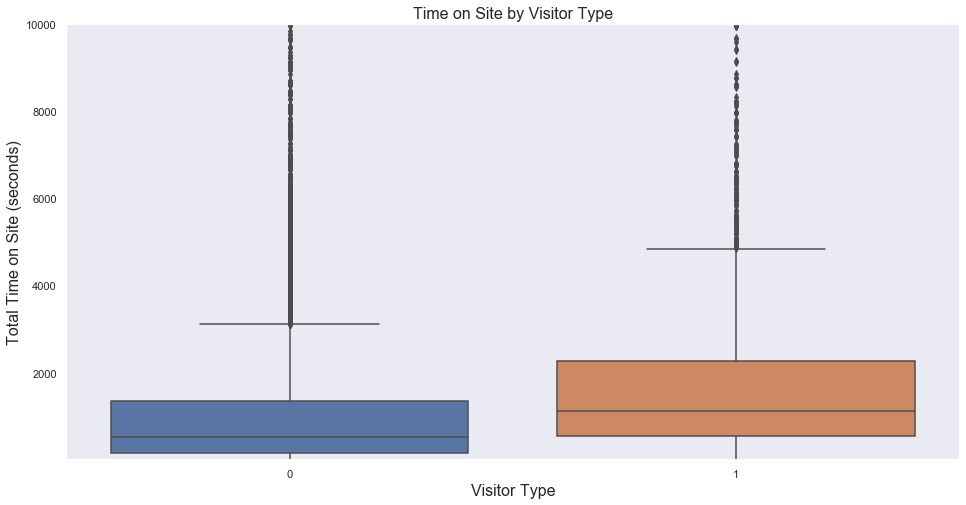

In [93]:
plt.figure(figsize = (16,8))
sns.boxplot(df['Revenue'], df['ProductRelated_Duration'], data = df)
plt.title("Time on Site by Visitor Type", fontsize = 16)
plt.xlabel("Visitor Type", fontsize = 16)
plt.ylabel("Total Time on Site (seconds)", fontsize = 16)
plt.ylim(10, 10000);

## Does browser affect Bounce Rates?

    Looks like from the graph below that browsers 3, and 12 have the higest bounce rates meaning there may be something with the UI design 

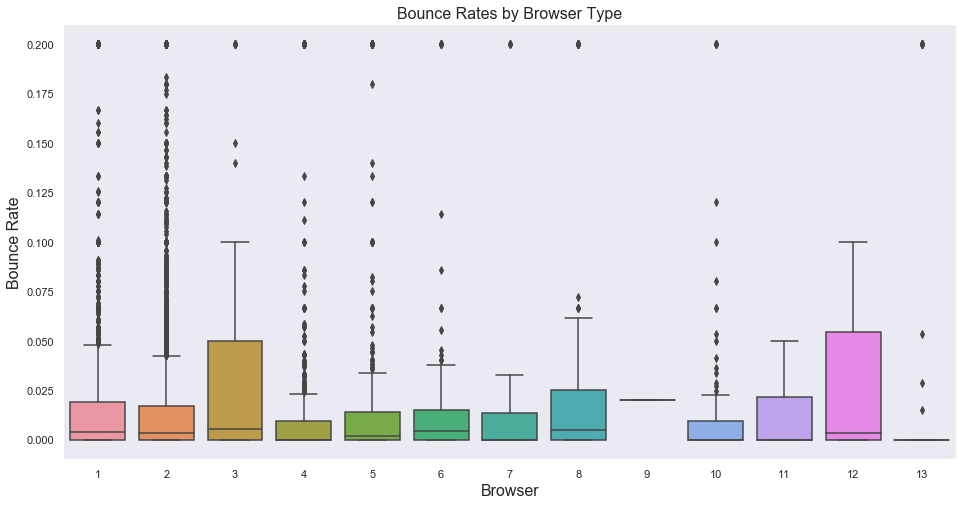

In [104]:
plt.figure(figsize = (16,8))
sns.boxplot(df['Browser'], df['BounceRates'], data = df)
plt.title("Bounce Rates by Browser Type", fontsize = 16)
plt.xlabel("Browser", fontsize = 16)
plt.ylabel("Bounce Rate", fontsize = 16);
# plt.ylim(10);